# Skin and subtypes

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import sys
from importlib import reload


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import CancerType

## First iteration, individual subgroups

Init data

In [3]:
skin = CancerType('Skin')

In [4]:
skin.countSubtypes()

[['80703' 18]
 ['80710' 11]
 ['87203' 1030]
 ['87213' 22]
 ['87303' 16]
 ['88333' 11]
 ['97003' 32]
 ['C43.5' 13]
 ['C43.6' 13]
 ['C43.7' 24]]


```
8070/3: Epidermoid carcinoma (Squamous cell carcinoma), NOS
8071/0: Keratinizing (Squamous cell carcinoma)
8720/3: Malignant melanoma, NOS
8721/3: Nodular melanoma
8730/3: Amelanotic melanoma
8833/3: Pigmented dermatofibrosarcoma protuberans (Bednar tumor)
9700/3: Mycosis fungoides (Pagetoid reticulosis)
```

In [9]:
code_remap = {
    '80703': 'Epidermoid carcinoma',
    '80710': 'Keratinizing',
    '87203': 'Melanoma',
    '87213': 'Nodular melanoma',
    '87303': 'Amelanotic melanoma',
    '88333': 'Bednar tumor',
    '97003': 'Pagetoid reticulosis',
    'C43.5': 'Not specified',
    'C43.6': 'Not specified',
    'C43.7': 'Not specified'
}

In [10]:
skin.relabel(code_remap)

In [11]:
skin.countSubtypes()

[['Amelanotic melanoma' 16]
 ['Bednar tumor' 11]
 ['Epidermoid carcinoma' 18]
 ['Keratinizing' 11]
 ['Melanoma' 1030]
 ['Nodular melanoma' 22]
 ['Not specified' 50]
 ['Pagetoid reticulosis' 32]]


PCA done! Time elapsed: 0.15221810340881348 seconds
Cumulative explained variation for 50 principal components: 0.9076438361090532
t-SNE done! Time elapsed: 10.284313917160034 seconds


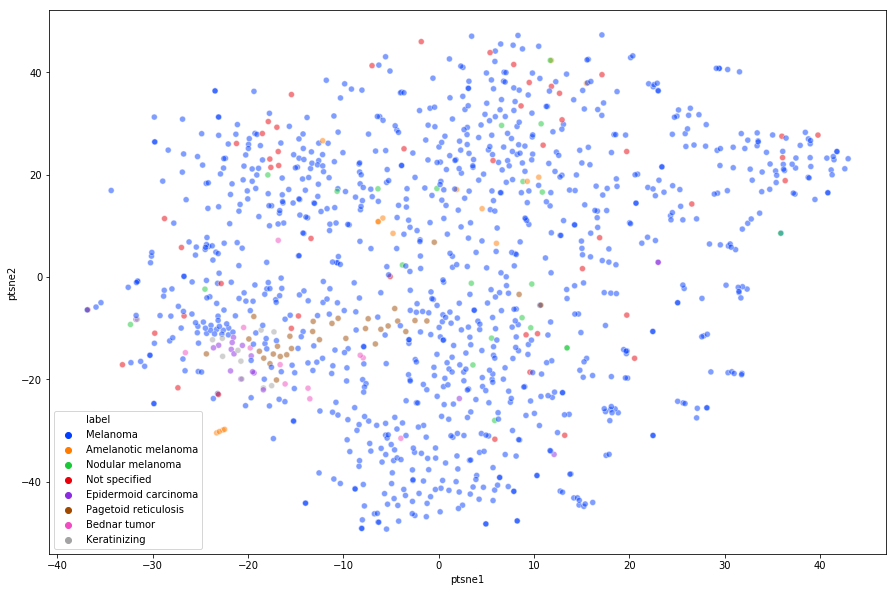

In [12]:
skin.pcaTSNE()

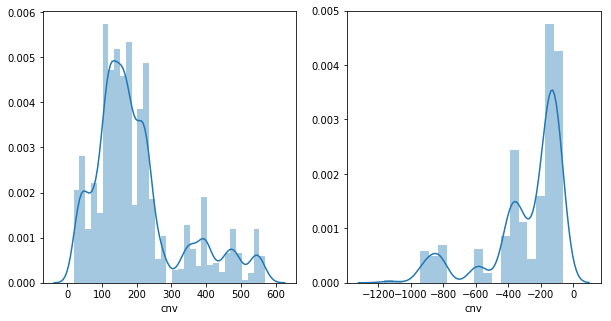

In [13]:
skin.groupData()

In [14]:
skin.analyze([500, 300, -700, -300])
skin.dumpFiles()

In [15]:
skin.countData()

amp_genes	(404, 9)
del_genes	(264, 9)
genes	404
high_amp_genes	(83, 9)
low_amp_genes	(321, 9)
high_del_genes	(75, 9)
low_del_genes	(189, 9)
high_amp_census	(4, 9)
low_amp_census	(15, 9)
amp_census	(19, 9)
high_del_census	(3, 9)
low_del_census	(11, 9)
del_census	(14, 9)
census	33


### Epidermoid carcinoma: 8070/3

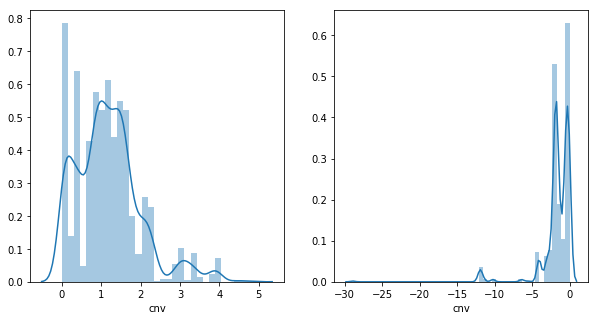

In [16]:
subtype = 'Epidermoid carcinoma'
skin.prepareSubtype(subtype)

In [17]:
skin.analyzeSubtype(subtype,[3, 2, -10, -4])
skin.dumpSubtypeFiles(subtype)

### Keratinizing: 8071/0

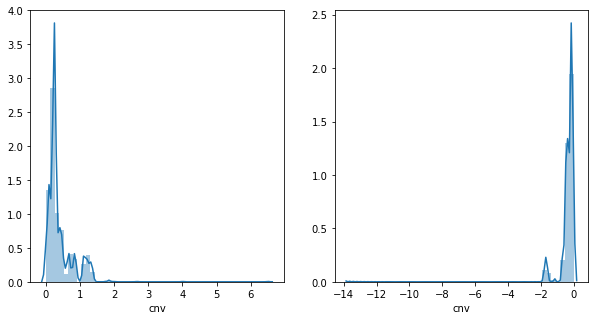

In [18]:
subtype = 'Keratinizing'
skin.prepareSubtype(subtype)

In [19]:
skin.analyzeSubtype(subtype,[2, 1, -2, -1])
skin.dumpSubtypeFiles(subtype)

### Melanoma: 8720/3

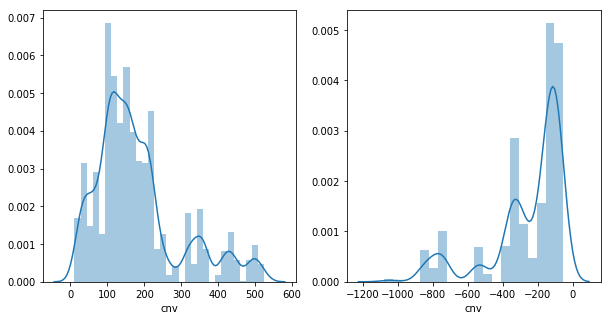

In [20]:
subtype = 'Melanoma'
skin.prepareSubtype(subtype)

In [21]:
skin.analyzeSubtype(subtype,[400, 300, -650, -200])
skin.dumpSubtypeFiles(subtype)

### Nodular melanoma: 8721/3

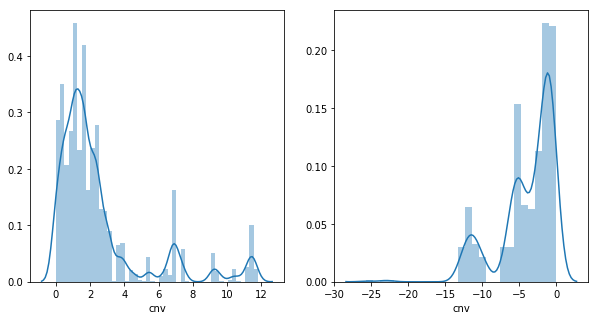

In [22]:
subtype = 'Nodular melanoma'
skin.prepareSubtype(subtype)

In [23]:
skin.analyzeSubtype(subtype,[8, 6, -9, -4])
skin.dumpSubtypeFiles(subtype)

### Amelanotic melanoma: 8730/3

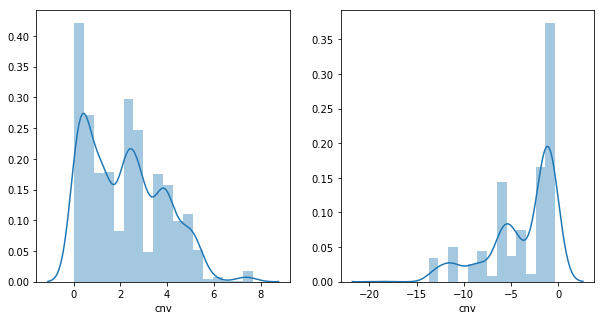

In [24]:
subtype = 'Amelanotic melanoma'
skin.prepareSubtype(subtype)

In [25]:
skin.analyzeSubtype(subtype,[6, 2, -10, -4])
skin.dumpSubtypeFiles(subtype)

### Bednar tumor: 8833/3

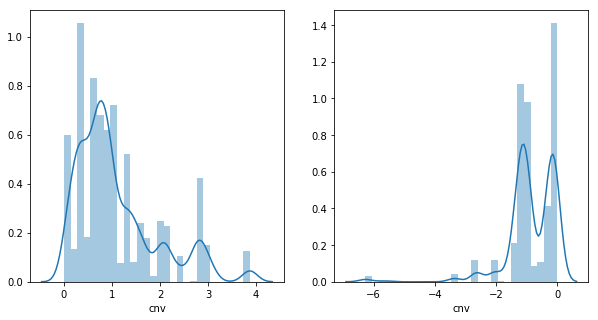

In [26]:
subtype = 'Bednar tumor'
skin.prepareSubtype(subtype)

In [27]:
skin.analyzeSubtype(subtype,[3, 2, -4, -2])
skin.dumpSubtypeFiles(subtype)

### Pagetoid reticulosis: 9700/3

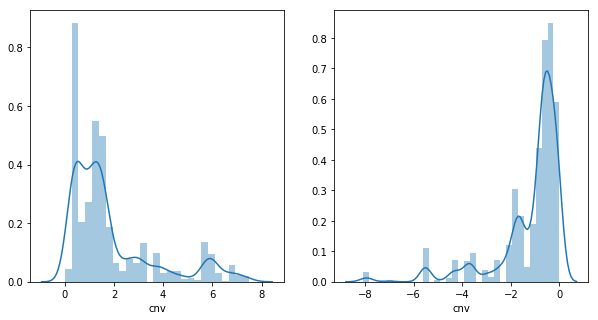

In [28]:
subtype = 'Pagetoid reticulosis'
skin.prepareSubtype(subtype)

In [29]:
skin.analyzeSubtype(subtype,[5, 3, -5, -3])
skin.dumpSubtypeFiles(subtype)

### Conclusion

The 2 melanoma subgroups are similar enough to the "melanoma", merge them.

Because of the low number of samples, the other signatures are not very strong.

## Second iteration, merge

In [2]:
skin = CancerType('Skin')

In [31]:
skin.countSubtypes()

[['80703' 18]
 ['80710' 11]
 ['87203' 1030]
 ['87213' 22]
 ['87303' 16]
 ['88333' 11]
 ['97003' 32]
 ['C43.5' 13]
 ['C43.6' 13]
 ['C43.7' 24]]


```
8070/3: Epidermoid carcinoma (Squamous cell carcinoma), NOS
8071/0: Keratinizing (Squamous cell carcinoma)
8720/3: Malignant melanoma, NOS
8721/3: Nodular melanoma
8730/3: Amelanotic melanoma
8833/3: Pigmented dermatofibrosarcoma protuberans (Bednar tumor)
9700/3: Mycosis fungoides (Pagetoid reticulosis)
```

In [3]:
code_remap = {
    '80703': 'Epidermoid carcinoma',
    '80710': 'Keratinizing',
    '87203': 'Melanoma',
    '87213': 'Melanoma',
    '87303': 'Melanoma',
    '88333': 'Bednar tumor',
    '97003': 'Pagetoid reticulosis',
    'C43.5': 'Not specified',
    'C43.6': 'Not specified',
    'C43.7': 'Not specified'
}

In [4]:
skin.relabel(code_remap)

In [5]:
skin.countSubtypes()

[['Bednar tumor' 11]
 ['Epidermoid carcinoma' 18]
 ['Keratinizing' 11]
 ['Melanoma' 1068]
 ['Not specified' 50]
 ['Pagetoid reticulosis' 32]]


In [6]:
skin.dumpSubtypeCounts()

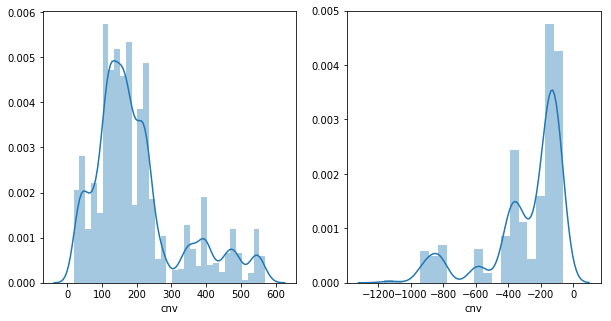

In [13]:
skin.groupData()

In [14]:
skin.analyze([500, 300, -700, -300])
skin.dumpFiles()

### Epidermoid carcinoma: 8070/3

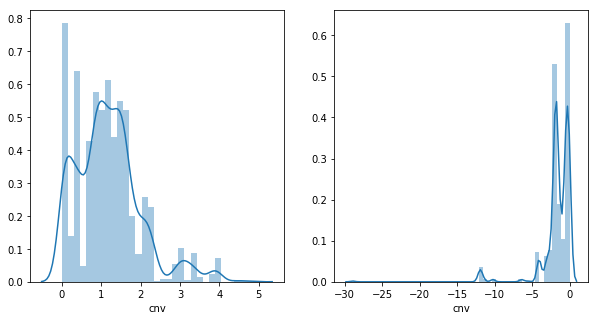

In [16]:
subtype = 'Epidermoid carcinoma'
skin.prepareSubtype(subtype)

In [17]:
skin.analyzeSubtype(subtype,[3, 2, -10, -4])
skin.dumpSubtypeFiles(subtype)

### Keratinizing: 8071/0

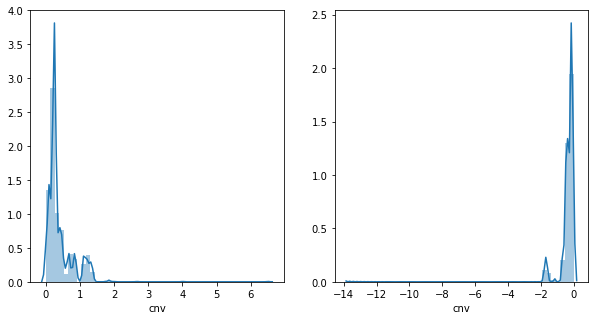

In [18]:
subtype = 'Keratinizing'
skin.prepareSubtype(subtype)

In [19]:
skin.analyzeSubtype(subtype,[2, 1, -2, -1])
skin.dumpSubtypeFiles(subtype)

### Melanoma: 8720/3, 8721/3, 8730/3

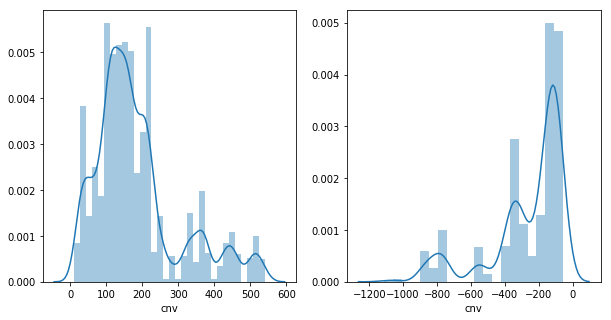

In [35]:
subtype = 'Melanoma'
skin.prepareSubtype(subtype)

In [36]:
skin.analyzeSubtype(subtype,[400, 300, -650, -200])
skin.dumpSubtypeFiles(subtype)

### Bednar tumor: 8833/3

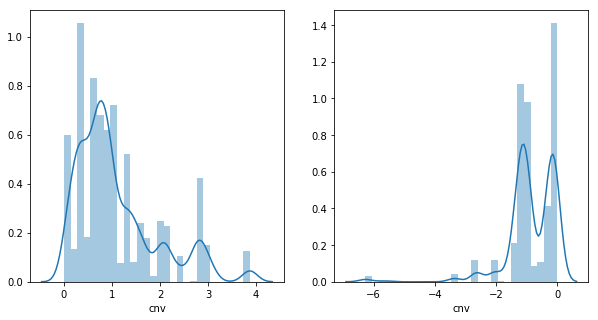

In [26]:
subtype = 'Bednar tumor'
skin.prepareSubtype(subtype)

In [27]:
skin.analyzeSubtype(subtype,[3, 2, -4, -2])
skin.dumpSubtypeFiles(subtype)

### Pagetoid reticulosis: 9700/3

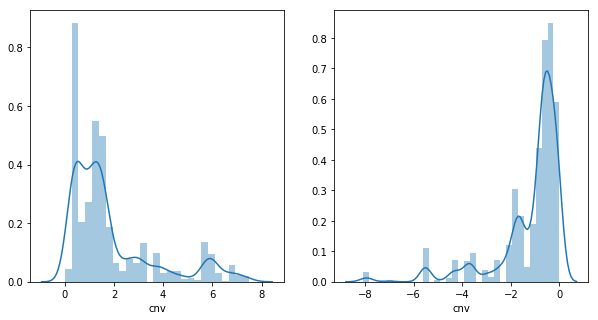

In [28]:
subtype = 'Pagetoid reticulosis'
skin.prepareSubtype(subtype)

In [29]:
skin.analyzeSubtype(subtype,[5, 3, -5, -3])
skin.dumpSubtypeFiles(subtype)